# Data Generation
## Graph Classes

we use the following graph classes:
- Chemical Graphs (Molecules)
- Random
- Small World
- Scale Free

## Data Save

We save the data as pickle file

In [1]:
import numpy as np
import networkx as nx

def graph_load_batch(min_num_nodes = 20, max_num_nodes = 1000, name = 'ENZYMES', node_attributes = True, graph_labels=True):
    '''
    load many graphs, e.g. enzymes
    :return: a list of graphs
    '''
    print('Loading graph dataset: '+str(name))
    G = nx.Graph()
    # load data
    path = './../data/molecules/'+name+'/'
    data_adj = np.loadtxt(path+name+'_A.txt', delimiter=',').astype(int)
    if node_attributes:
        data_node_att = np.loadtxt(path+name+'_node_attributes.txt', delimiter=',')
    data_node_label = np.loadtxt(path+name+'_node_labels.txt', delimiter=',').astype(int)
    data_graph_indicator = np.loadtxt(path+name+'_graph_indicator.txt', delimiter=',').astype(int)
    if graph_labels:
        data_graph_labels = np.loadtxt(path+name+'_graph_labels.txt', delimiter=',').astype(int)


    data_tuple = list(map(tuple, data_adj))
    # print(len(data_tuple))
    # print(data_tuple[0])

    # add edges
    G.add_edges_from(data_tuple)
    # add node attributes
    for i in range(data_node_label.shape[0]):
        if node_attributes:
            G.add_node(i+1, feature = data_node_att[i])
        G.add_node(i+1, label = data_node_label[i])
    G.remove_nodes_from(list(nx.isolates(G)))

    # print(G.number_of_nodes())
    # print(G.number_of_edges())

    # split into graphs
    graph_num = data_graph_indicator.max()
    node_list = np.arange(data_graph_indicator.shape[0])+1
    graphs = []
    max_nodes = 0
    for i in range(graph_num):
        # find the nodes for each graph
        nodes = node_list[data_graph_indicator==i+1]
        G_sub = G.subgraph(nodes)
        if graph_labels:
            G_sub.graph['label'] = data_graph_labels[i]
        # print('nodes', G_sub.number_of_nodes())
        # print('edges', G_sub.number_of_edges())
        # print('label', G_sub.graph)
        if G_sub.number_of_nodes()>=min_num_nodes and G_sub.number_of_nodes()<=max_num_nodes:
            graphs.append(G_sub)
            if G_sub.number_of_nodes() > max_nodes:
                max_nodes = G_sub.number_of_nodes()
            # print(G_sub.number_of_nodes(), 'i', i)
    # print('Graph dataset name: {}, total graph num: {}'.format(name, len(graphs)))
    # logging.warning('Graphs loaded, total num: {}'.format(len(graphs)))
    print('Loaded')
    return graphs

In [6]:
import networkx as nx
import os
import pickle

dataset = {
    "random": [],
    "smallworld": [],
    "scalefree": [],
    "chemical": [],
}

# generate 1000 random graphs using networkx and save them in the dataset
print("Generating random, smallworld and scalefree graphs...")
for i in range(1000):

    # random graph
    G = nx.gnp_random_graph(100, 0.1)
    dataset["random"].append(G)

    # small world graph
    G = nx.watts_strogatz_graph(100, 4, 0.1)
    dataset["smallworld"].append(G)

    # scale free graph
    G = nx.barabasi_albert_graph(100, 2)
    dataset["scalefree"].append(G)

print("Done")

# read the chemical graphs from the ./data/molecules using graph_load_batch
mutag_graphs = graph_load_batch(name="MUTAG", node_attributes=False)
dataset["chemical"].extend(mutag_graphs)
nci1_graphs = graph_load_batch(name="NCI1", node_attributes=False)
dataset["chemical"].extend(nci1_graphs)
nci109_graphs = graph_load_batch(name="NCI109", node_attributes=False)
dataset["chemical"].extend(nci109_graphs)


# save the dataset
import pickle
with open("dataset.pickle", "wb") as f:
    pickle.dump(dataset, f)


Generating random, smallworld and scalefree graphs...
Done
Loading graph dataset: MUTAG
Loaded
Loading graph dataset: NCI1
Loaded
Loading graph dataset: NCI109
Loaded


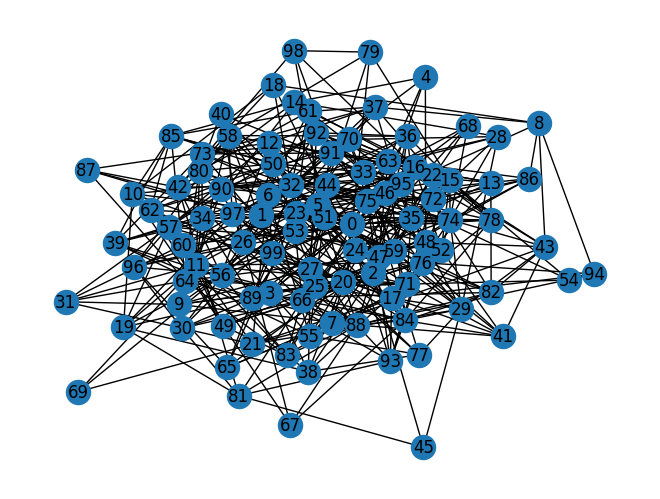

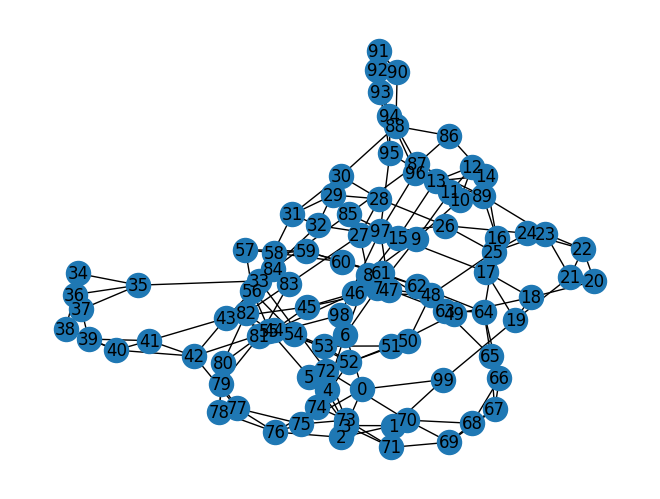

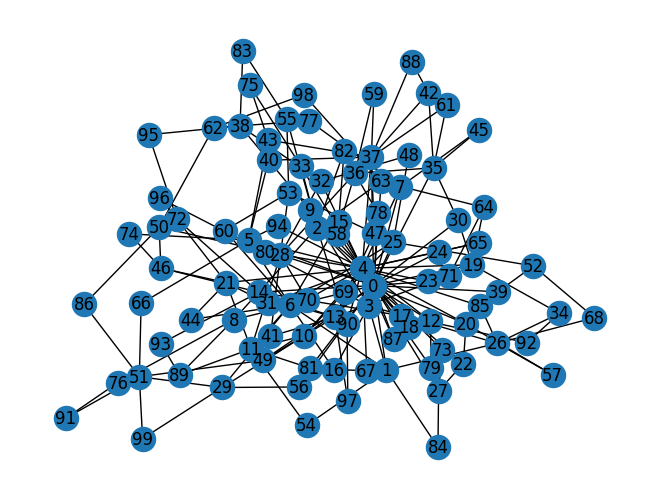

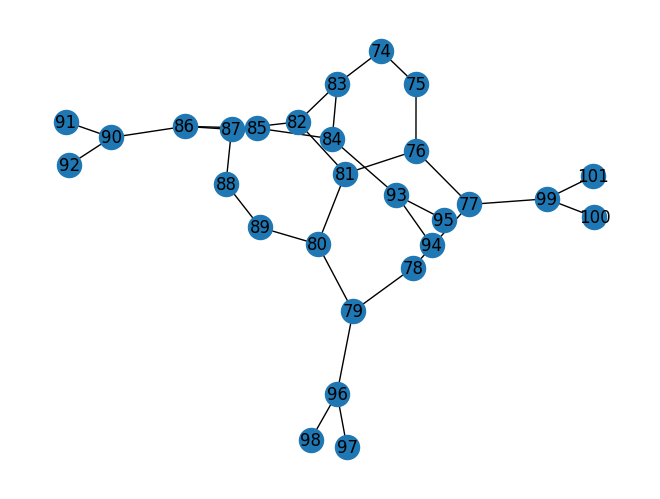

In [7]:
# display the first graph of each type in the dataset
import matplotlib.pyplot as plt
import networkx as nx

# random graph
G = dataset["random"][0]
nx.draw(G, with_labels=True)
plt.show()

# small world graph
G = dataset["smallworld"][0]
nx.draw(G, with_labels=True)
plt.show()

# scale free graph
G = dataset["scalefree"][0]
nx.draw(G, with_labels=True)
plt.show()

# chemical graph
G = dataset["chemical"][0]
nx.draw(G, with_labels=True)
plt.show()